<a href="https://colab.research.google.com/github/elhadidiilias3612encg-hash/24010422-ILIAS-EL-HADIDI-/blob/main/Code%20PROJET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("timmofeyy/-cerial-prices-changes-within-last-30-years")

print("Path to dataset files:", path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


100%|██████████| 8.14k/8.14k [00:00<00:00, 9.69MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/timmofeyy/-cerial-prices-changes-within-last-30-years/versions/1


In [5]:
import os
import pandas as pd

# The correct CSV file name was identified from the previous run's os.listdir(path) output.
csv_file_name = 'rice_wheat_corn_prices.csv'

# Construct the full path to the CSV file using the correct name
csv_file_path = os.path.join(path, csv_file_name)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nConcise summary of the DataFrame:")
df.info()


First 5 rows of the DataFrame:
   Year Month  Price_wheat_ton  Price_rice_ton  Price_corn_ton  \
0  1992   Feb           170.12          278.25          113.62   
1  1992   Mar           161.44          277.20          117.00   
2  1992   Apr           153.07          278.00          108.52   
3  1992   May           139.72          274.00          109.64   
4  1992   Jun           140.36          268.80          110.90   

   Inflation_rate  Price_wheat_ton_infl  Price_rice_ton_infl  \
0           89.59                322.53               527.53   
1           89.59                306.07               525.54   
2           89.59                290.21               527.06   
3           89.59                264.90               519.48   
4           89.59                266.11               509.62   

   Price_corn_ton_infl  
0               215.41  
1               221.82  
2               205.74  
3               207.87  
4               210.26  

Concise summary of the DataFrame:
<

In [7]:
import pandas as pd

# Create a new 'Date' column by combining 'Year' and 'Month'
df['Date'] = df['Year'].astype(str) + '-' + df['Month']

# Convert the newly created 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%b')

# Drop the original 'Year' and 'Month' columns from the DataFrame
df = df.drop(columns=['Year', 'Month'])

print("DataFrame after creating and converting 'Date' column and dropping 'Year' and 'Month':")
print(df.head())
print("\nDataFrame Info after Date column processing:")
df.info()

DataFrame after creating and converting 'Date' column and dropping 'Year' and 'Month':
   Price_wheat_ton  Price_rice_ton  Price_corn_ton  Inflation_rate  \
0           170.12          278.25          113.62           89.59   
1           161.44          277.20          117.00           89.59   
2           153.07          278.00          108.52           89.59   
3           139.72          274.00          109.64           89.59   
4           140.36          268.80          110.90           89.59   

   Price_wheat_ton_infl  Price_rice_ton_infl  Price_corn_ton_infl       Date  
0                322.53               527.53               215.41 1992-02-01  
1                306.07               525.54               221.82 1992-03-01  
2                290.21               527.06               205.74 1992-04-01  
3                264.90               519.48               207.87 1992-05-01  
4                266.11               509.62               210.26 1992-06-01  

DataFrame Info af

In [8]:
print("\nMissing values before imputation:")
print(df.isnull().sum())

# Identify numerical columns with missing values
numerical_cols_with_missing = df.select_dtypes(include=['float64', 'int64']).columns[df.select_dtypes(include=['float64', 'int64']).isnull().any()].tolist()

# Impute missing values with the median for numerical columns
for col in numerical_cols_with_missing:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Imputed missing values in column '{col}' with median: {median_val}")

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values before imputation:
Price_wheat_ton         1
Price_rice_ton          0
Price_corn_ton          0
Inflation_rate          1
Price_wheat_ton_infl    1
Price_rice_ton_infl     1
Price_corn_ton_infl     1
Date                    0
dtype: int64
Imputed missing values in column 'Price_wheat_ton' with median: 175.27
Imputed missing values in column 'Inflation_rate' with median: 28.3
Imputed missing values in column 'Price_wheat_ton_infl' with median: 228.31
Imputed missing values in column 'Price_rice_ton_infl' with median: 455.54
Imputed missing values in column 'Price_corn_ton_infl' with median: 186.02

Missing values after imputation:
Price_wheat_ton         0
Price_rice_ton          0
Price_corn_ton          0
Inflation_rate          0
Price_wheat_ton_infl    0
Price_rice_ton_infl     0
Price_corn_ton_infl     0
Date                    0
dtype: int64


/tmp/ipython-input-555588032.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [9]:
print("\nMissing values before imputation:")
print(df.isnull().sum())

# Identify numerical columns with missing values
numerical_cols_with_missing = df.select_dtypes(include=['float64', 'int64']).columns[df.select_dtypes(include=['float64', 'int64']).isnull().any()].tolist()

# Impute missing values with the median for numerical columns
for col in numerical_cols_with_missing:
    median_val = df[col].median()
    # Refactor to avoid FutureWarning: A value is trying to be set on a copy of a DataFrame
    df[col] = df[col].fillna(median_val)
    print(f"Imputed missing values in column '{col}' with median: {median_val}")

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Remove duplicate rows
rows_before_deduplication = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_deduplication = df.shape[0]
print(f"\nNumber of rows before deduplication: {rows_before_deduplication}")
print(f"Number of rows after deduplication: {rows_after_deduplication}")
print(f"Number of duplicate rows removed: {rows_before_deduplication - rows_after_deduplication}")

# Display descriptive statistics of the processed DataFrame
print("\nDescriptive statistics of the processed DataFrame:")
print(df.describe())


Missing values before imputation:
Price_wheat_ton         0
Price_rice_ton          0
Price_corn_ton          0
Inflation_rate          0
Price_wheat_ton_infl    0
Price_rice_ton_infl     0
Price_corn_ton_infl     0
Date                    0
dtype: int64

Missing values after imputation:
Price_wheat_ton         0
Price_rice_ton          0
Price_corn_ton          0
Inflation_rate          0
Price_wheat_ton_infl    0
Price_rice_ton_infl     0
Price_corn_ton_infl     0
Date                    0
dtype: int64

Number of rows before deduplication: 360
Number of rows after deduplication: 360
Number of duplicate rows removed: 0

Descriptive statistics of the processed DataFrame:
       Price_wheat_ton  Price_rice_ton  Price_corn_ton  Inflation_rate  \
count       360.000000      360.000000      360.000000      360.000000   
mean        185.275000      364.105611      155.502750       36.294417   
min          85.300000      163.750000       75.270000       -1.290000   
25%         137.367500 

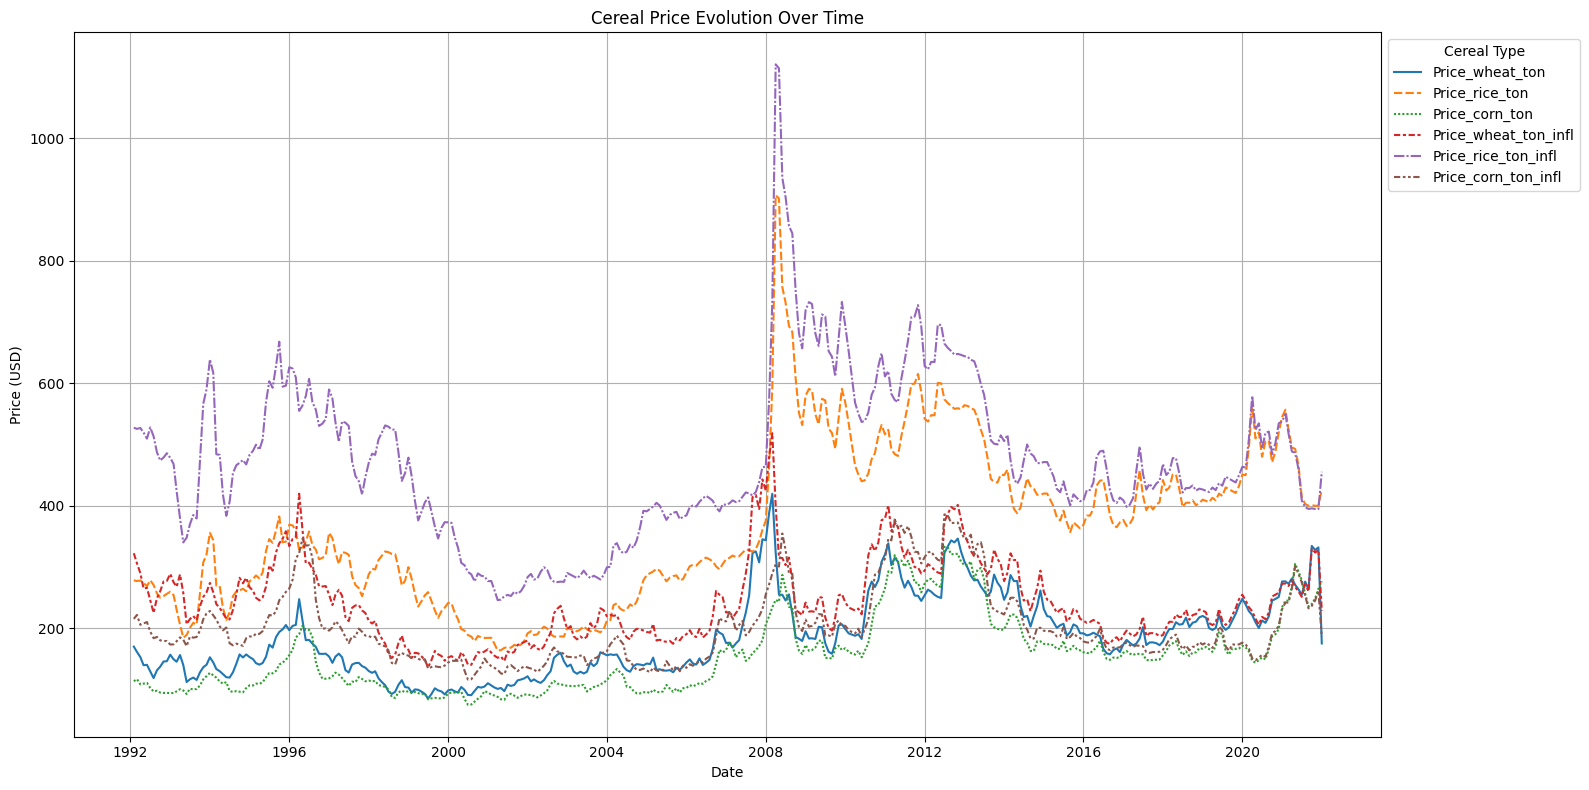

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set 'Date' column as the index
df_indexed = df.set_index('Date')

# Select only the columns that represent cereal prices
price_columns = [
    'Price_wheat_ton',
    'Price_rice_ton',
    'Price_corn_ton',
    'Price_wheat_ton_infl',
    'Price_rice_ton_infl',
    'Price_corn_ton_infl'
]

df_prices = df_indexed[price_columns]

# Create a line plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_prices)

# Add title and labels
plt.title('Cereal Price Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Add legend
plt.legend(title='Cereal Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


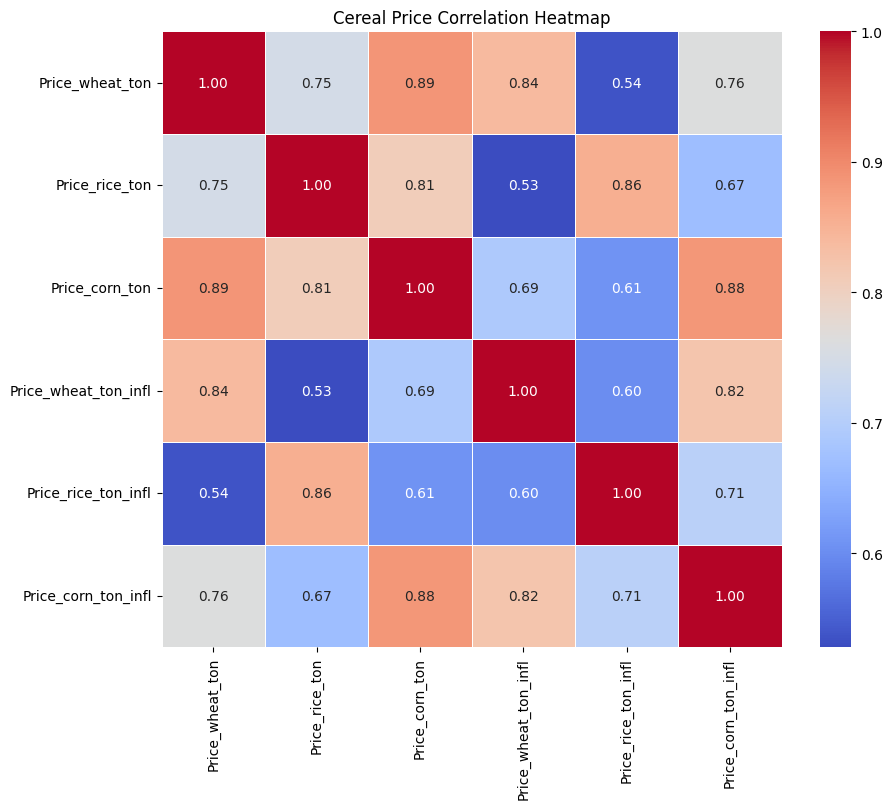

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the price columns
correlation_matrix = df_prices.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Cereal Price Correlation Heatmap')

# Display the plot
plt.show()

In [12]:
import pandas as pd

# Calculate the standard deviation for each price column
cereal_volatility = df_prices.std()

# Sort the volatilities in descending order
cereal_volatility_sorted = cereal_volatility.sort_values(ascending=False)

# Print the sorted volatilities
print("Cereal Price Volatility (Standard Deviation - sorted descending):")
print(cereal_volatility_sorted)

Cereal Price Volatility (Standard Deviation - sorted descending):
Price_rice_ton_infl     133.593254
Price_rice_ton          131.367591
Price_wheat_ton_infl     65.147219
Price_wheat_ton          64.896862
Price_corn_ton           62.611439
Price_corn_ton_infl      61.646919
dtype: float64


In [13]:
import pandas as pd

# Extract year from the 'Date' column
df['year'] = df['Date'].dt.year

# Extract month from the 'Date' column
df['month'] = df['Date'].dt.month

# Extract quarter from the 'Date' column
df['quarter'] = df['Date'].dt.quarter

# Display the first few rows of the DataFrame with the new columns
print("DataFrame after adding 'year', 'month', and 'quarter' features:")
print(df.head())

DataFrame after adding 'year', 'month', and 'quarter' features:
   Price_wheat_ton  Price_rice_ton  Price_corn_ton  Inflation_rate  \
0           170.12          278.25          113.62           89.59   
1           161.44          277.20          117.00           89.59   
2           153.07          278.00          108.52           89.59   
3           139.72          274.00          109.64           89.59   
4           140.36          268.80          110.90           89.59   

   Price_wheat_ton_infl  Price_rice_ton_infl  Price_corn_ton_infl       Date  \
0                322.53               527.53               215.41 1992-02-01   
1                306.07               525.54               221.82 1992-03-01   
2                290.21               527.06               205.74 1992-04-01   
3                264.90               519.48               207.87 1992-05-01   
4                266.11               509.62               210.26 1992-06-01   

   year  month  quarter  
0  1992 

In [14]:
import pandas as pd

# Define the target variable (y) and features (X)
# 'Price_wheat_ton' is specified as the target variable.
# Other price columns, inflation, and the original Date column are dropped from features.
# Also dropping the inflation adjusted prices for the respective cereal when the original cereal price is taken as target.

y = df['Price_wheat_ton']

# Drop the target column and other non-feature columns from X
X = df.drop(columns=[
    'Price_wheat_ton',
    'Date',
    'Price_wheat_ton_infl',
    'Price_rice_ton_infl',
    'Price_corn_ton_infl'
])

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 values of target (y):")
print(y.head())

Shape of features (X): (360, 6)
Shape of target (y): (360,)

First 5 rows of features (X):
   Price_rice_ton  Price_corn_ton  Inflation_rate  year  month  quarter
0          278.25          113.62           89.59  1992      2        1
1          277.20          117.00           89.59  1992      3        1
2          278.00          108.52           89.59  1992      4        2
3          274.00          109.64           89.59  1992      5        2
4          268.80          110.90           89.59  1992      6        2

First 5 values of target (y):
0    170.12
1    161.44
2    153.07
3    139.72
4    140.36
Name: Price_wheat_ton, dtype: float64


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for better readability and to preserve column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled features (X_scaled):")
print(X_scaled.head())
print("\nDescriptive statistics of scaled features:")
print(X_scaled.describe())

First 5 rows of scaled features (X_scaled):
   Price_rice_ton  Price_corn_ton  Inflation_rate      year     month  \
0       -0.654462       -0.669862        2.008522 -1.684016 -1.303572   
1       -0.662466       -0.615803        2.008522 -1.684016 -1.013890   
2       -0.656368       -0.751430        2.008522 -1.684016 -0.724207   
3       -0.686859       -0.733517        2.008522 -1.684016 -0.434524   
4       -0.726498       -0.713365        2.008522 -1.684016 -0.144841   

    quarter  
0 -1.341641  
1 -1.341641  
2 -0.447214  
3 -0.447214  
4 -0.447214  

Descriptive statistics of scaled features:
       Price_rice_ton  Price_corn_ton  Inflation_rate          year  \
count    3.600000e+02    3.600000e+02    3.600000e+02  3.600000e+02   
mean    -4.736952e-16    6.315935e-16   -2.368476e-16  8.684411e-15   
std      1.001392e+00    1.001392e+00    1.001392e+00  1.001392e+00   
min     -1.527275e+00   -1.283223e+00   -1.416424e+00 -1.684016e+00   
25%     -7.811915e-01   -8.206434e

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Using a common split ratio, e.g., 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (288, 6)
Shape of X_test: (72, 6)
Shape of y_train: (288,)
Shape of y_test: (72,)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
# Using a random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Model training complete and predictions made.")
print("First 5 predictions:", y_pred[:5])


Model training complete and predictions made.
First 5 predictions: [286.5261 165.3555 222.9509 178.9339 164.5474]


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 14.62
Mean Squared Error (MSE): 403.62
Root Mean Squared Error (RMSE): 20.09
R-squared (R2): 0.89


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor model with a random state
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
# scoring='r2' for R-squared metric, cv=3 for 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2', cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV to find best hyperparameters...")
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

Starting GridSearchCV to find best hyperparameters...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best parameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


/tmp/ipython-input-1084727819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df.index, y=importance_df.values, palette='viridis')


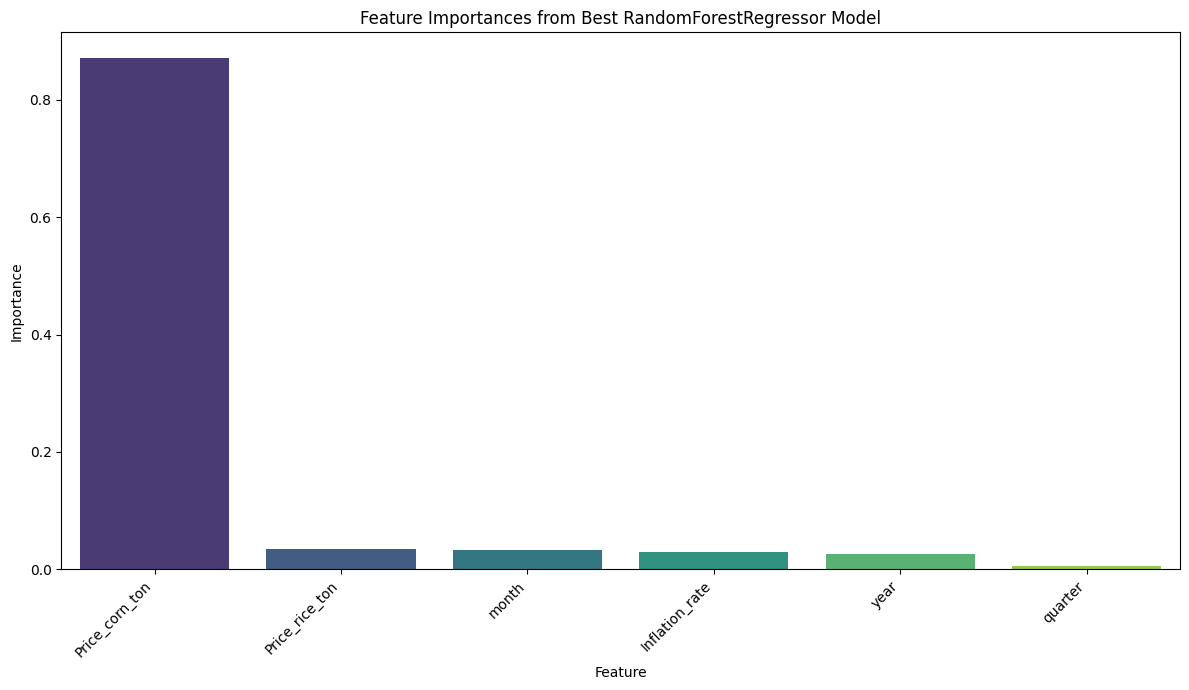

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Retrieve the best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a pandas Series for better visualization, using feature names from X_train
feature_names = X_train.columns
importance_df = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order
importance_df = importance_df.sort_values(ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=importance_df.index, y=importance_df.values, palette='viridis')
plt.title('Feature Importances from Best RandomForestRegressor Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

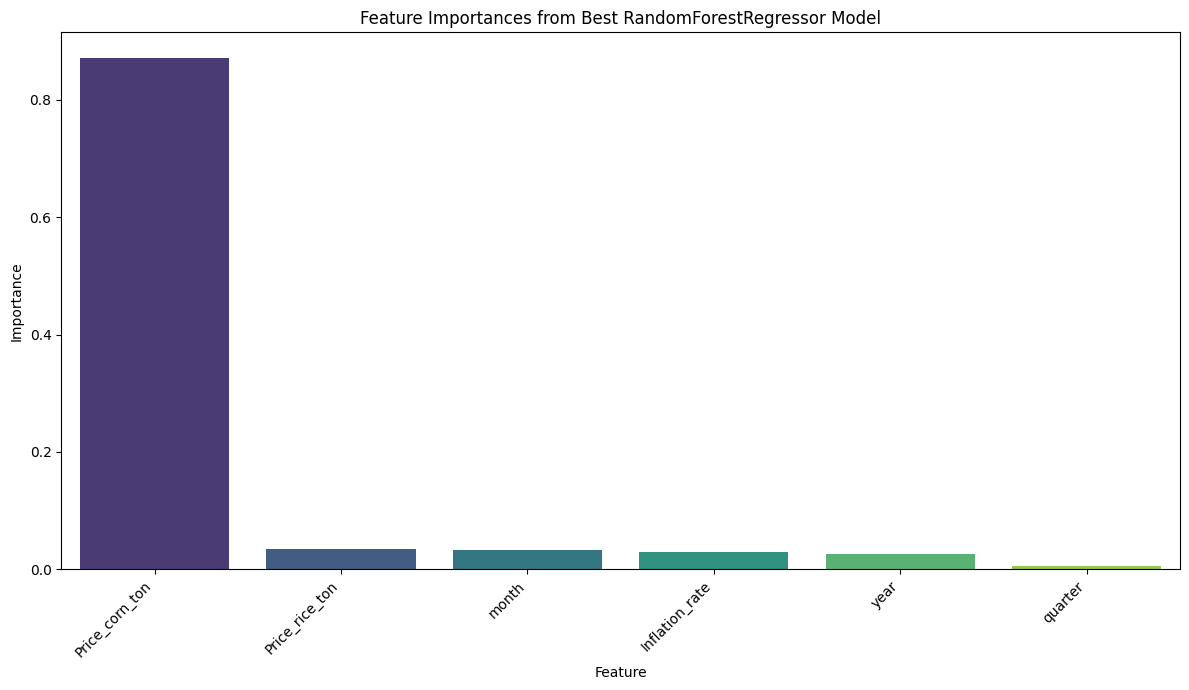

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Retrieve the best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a pandas Series for better visualization, using feature names from X_train
feature_names = X_train.columns
importance_df = pd.Series(feature_importances, index=feature_names)

# Sort feature importances in descending order
importance_df = importance_df.sort_values(ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=importance_df.index, y=importance_df.values, palette='viridis', hue=importance_df.index, legend=False)
plt.title('Feature Importances from Best RandomForestRegressor Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()